In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [63]:
pwd = os.getcwd()
file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [64]:
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [65]:
data_modified = data.copy()

In [66]:
data_modified.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (s)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms)', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
   

In [67]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'TCP DL Retrans. Vol (Bytes)':'sum', "TCP UL Retrans. Vol (Bytes)": "sum", "Avg RTT DL (ms)": "sum", "Avg RTT UL (ms)": "sum",  "Avg Bearer TP DL (kbps)": "sum", "Avg Bearer TP UL (kbps)": "sum", 'Handset Type': 'first' })

In [68]:
user_agg.reset_index(drop=True, inplace=True)

In [69]:
user_agg.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,33601001722.00,21006809.00,771052.00,46.00,0.00,37.00,39.00,Huawei P20 Lite Huawei Nova 3E
1,33601001754.00,21006809.00,771052.00,30.00,1.00,48.00,51.00,Apple iPhone 7 (A1778)
2,33601002511.00,21006809.00,771052.00,106.00,18.00,48.00,49.00,Unknown
3,33601007832.00,1066.00,771052.00,69.00,15.00,204.00,44.00,Apple iPhone 5S (A1457)
4,33601008617.00,30356439.00,792254.00,114.00,5.00,40395.00,16449.00,Apple iPhone Se (A1723)


In [70]:
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [71]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
user_agg.dtypes

MSISDN/Number                   object
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
Handset Type                    object
dtype: object

In [73]:
transmission_per_user = pd.DataFrame()

In [74]:
transmission_per_user["MSISDN/Number"] = user_agg["MSISDN/Number"]

In [75]:
transmission_per_user["Average TCP Retransmission"] = user_agg["TCP DL Retrans. Vol (Bytes)"] + user_agg["TCP UL Retrans. Vol (Bytes)"]

In [76]:
transmission_per_user["Average RTT"] = user_agg["Avg RTT DL (ms)"] + user_agg["Avg RTT UL (ms)"]

In [77]:
transmission_per_user["Average throughput"] = user_agg["Avg Bearer TP DL (kbps)"] + user_agg["Avg Bearer TP UL (kbps)"]

In [78]:
transmission_per_user["Handset Type"] = user_agg["Handset Type"]

In [79]:
transmission_per_user.head()

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
0,33601001722.0,21777861.00,46.00,76.00,Huawei P20 Lite Huawei Nova 3E
1,33601001754.0,21777861.00,31.00,99.00,Apple iPhone 7 (A1778)
2,33601002511.0,21777861.00,124.00,97.00,Unknown
3,33601007832.0,772118.00,84.00,248.00,Apple iPhone 5S (A1457)
4,33601008617.0,31148693.00,119.00,56844.00,Apple iPhone Se (A1723)


In [80]:
transmission_per_user.nlargest(columns=["Average TCP Retransmission"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
66616,33667725464.0,8354209105.00,703.00,379713.00,Huawei B528S-23A
33988,33659084281.0,7941860302.00,396.00,210259.00,Huawei B528S-23A
42210,33660977522.0,7374910112.00,417.00,216852.00,Huawei B528S-23A
94334,33761284050.0,6043978448.00,351.00,144570.00,Huawei B528S-23A
97859,33762644658.0,5879989037.00,2860.00,549661.00,Huawei B528S-23A
25663,33650658056.0,5593366107.00,1543.00,259548.00,Huawei B528S-23A
51449,33663180885.0,5566928580.00,583.00,127603.00,Huawei B528S-23A
70658,33669054076.0,5195992825.00,321.00,142042.00,Huawei B528S-23A
99572,33763572381.0,5179458974.00,479.00,120288.00,Huawei B528S-23A
31833,33658638625.0,5165856986.00,171.00,105875.00,Huawei B528S-23A


In [83]:
transmission_per_user.nsmallest(columns=["Average TCP Retransmission"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
23369,33650128412.0,97.00,48.00,30581.00,Apple iPhone 5S (A1457)
6326,33614777138.0,128.00,64.00,8654.00,Huawei Ascend Mate7
96625,33762062356.0,129.00,41.00,32577.00,Apple iPhone 8 (A1905)
13487,33626357513.0,134.00,40.00,10964.00,Apple iPhone 7 (A1778)
2162,33607833304.0,143.00,32.00,16853.00,Apple iPhone 5C (A1529)
25752,33650681239.0,176.00,52.00,7039.00,Xiaomi Communica. Mi Max3
101837,33769636458.0,176.00,32.00,12210.00,Apple iPhone 5S (A1457)
105397,33784203839.0,177.00,74.00,5897.00,Apple iPhone Xr (A2108)
77810,33679366089.0,179.00,39.00,35068.00,Samsung Galaxy S6 Plus (Sm-G928)
89070,33699694715.0,182.00,169.00,169.00,Samsung Galaxy Trend Lite 2 (Sm-G318X)


In [108]:
transmission_per_user.value_counts(subset=["Average TCP Retransmission"])[:10]

Average TCP Retransmission
21777861.00                   47122
43555722.00                    7468
65333583.00                    1032
21008103.00                     363
87111444.00                     252
21008139.00                     164
772382.00                       144
42785964.00                      82
21008127.00                      81
771144.00                        76
dtype: int64

In [81]:
transmission_per_user.nlargest(columns=["Average RTT"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
47806,33662317023.0,21777861.00,96924.00,3.00,Apple iPhone 8 (A1905)
41789,33660874265.0,43555722.00,64670.00,194.00,Apple iPhone 6 (A1586)
79950,33683692867.0,771144.00,54848.00,21.00,Lg Lg-D315
85368,33698551167.0,21022448.00,46021.00,303.00,Huawei B528S-23A
96064,33761813523.0,21083094.00,37084.00,21200.00,Huawei B528S-23A
69889,33668791629.0,43555722.00,36304.00,108.00,Huawei B528S-23A
93502,33760941100.0,540582.00,27278.00,5148.00,Samsung Galaxy S7 Edge (Sm-G935X)
1701,33606788933.0,784352.00,26300.00,144.00,Samsung Galaxy S9 Plus (Sm-G965F)
73972,33671816754.0,21012129.00,25715.00,71.00,Samsung Galaxy S6 Edge (Sm-G925X)
103954,33781865588.0,199904.00,25388.00,1608.00,Apple iPhone 6S (A1688)


In [102]:
transmission_per_user.nsmallest(columns=["Average RTT"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
28762,33652982188.0,21777861.00,0.00,100.00,Huawei P20 Pro
44582,33661575382.0,21777861.00,0.00,85.00,Huawei Pct-L29
38918,33660204450.0,21777861.00,2.00,113.00,Apple iPhone X (A1901)
83084,33695045499.0,21777861.00,4.00,121.00,Huawei P20
35896,33659493541.0,21777861.00,5.00,78.00,Apple iPhone 6S (A1688)
69411,33668619895.0,21777861.00,6.00,101.00,Apple iPhone 6S (A1688)
21884,33647679481.0,21777861.00,8.00,110.00,Huawei Honor View10
3861,33610846366.0,21777861.00,9.00,113.00,Samsung Galaxy S6 Edge (Sm-G925X)
74166,33672196893.0,21777861.00,9.00,91.00,Huawei P20 Lite Huawei Nova 3E
17790,33634684770.0,21777861.00,10.00,93.00,Huawei P20 Lite Huawei Nova 3E


In [107]:
transmission_per_user.value_counts(subset=["Average RTT"])[:10]

Average RTT
124.00         16539
29.00           2735
39.00           2163
248.00          1957
38.00           1447
30.00           1419
40.00           1382
28.00           1330
49.00           1192
31.00           1053
dtype: int64

In [82]:
transmission_per_user.nlargest(columns=["Average throughput"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
97232,33762333464.0,28113825.00,400.00,902222.00,Samsung Galaxy A8 (2018)
69658,33668708263.0,142987086.00,500.00,840424.00,Huawei B528S-23A
36114,33659546392.0,34739265.00,588.00,798342.00,Huawei B528S-23A
72883,33669946573.0,62717561.00,370.00,690815.00,Huawei B528S-23A
68771,33668425947.0,787659604.00,382.00,676858.00,Huawei B528S-23A
84173,33698174760.0,126723206.00,478.00,618797.00,Unknown
13084,33625700673.0,71627295.00,702.00,564179.00,Samsung Galaxy S9 Sm-G960F Ds
29194,33658075438.0,28784094.00,567.00,550352.00,Huawei B528S-23A
97859,33762644658.0,5879989037.00,2860.00,549661.00,Huawei B528S-23A
60544,33665658364.0,11248249.00,188.00,530353.00,Huawei B528S-23A


In [104]:
transmission_per_user.nsmallest(columns=["Average throughput"], n=10)

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
849,33603452974.0,21777861.00,124.00,0.00,Samsung Galaxy S9 Sm-G960F Ds
1195,33604131582.0,21777861.00,124.00,0.00,Lenovo Moto G (3Rd Gen) Ca12459445
2454,33608514832.0,21777861.00,124.00,0.00,Unknown
2585,33608752702.0,21777861.00,124.00,0.00,Samsung Galaxy J3 (Sm-J320X)
2651,33608892887.0,21777861.00,124.00,0.00,Samsung Galaxy S8 (Sm-G950F)
3218,33609847664.0,21777861.00,124.00,0.00,Samsung Galaxy S7 Edge (Sm-G935X)
3718,33610640063.0,21777861.00,124.00,0.00,Unknown
4253,33611523366.0,43555722.00,248.00,0.00,Samsung Galaxy S7 Edge (Sm-G935X)
7161,33616110252.0,21777861.00,124.00,0.00,Apple iPhone Xr (A2105)
7481,33616605202.0,21777861.00,124.00,0.00,Huawei P10


In [106]:
transmission_per_user.value_counts(subset=["Average throughput"])[:10]

Average throughput
15.00                 2687
63.00                 2072
97.00                 1024
90.00                 1006
98.00                  970
96.00                  866
99.00                  853
89.00                  816
95.00                  798
91.00                  793
dtype: int64

In [117]:
transmission_per_user.groupby(by=["Handset Type"], as_index=False).agg({"Average throughput": 'count'}).nlargest(n=10, columns="Average throughput")

,Handset Type,Average throughput
315,Huawei B528S-23A,10615
53,Apple iPhone 6S (A1688),6744
1242,Unknown,6648
49,Apple iPhone 6 (A1586),6245
59,Apple iPhone 7 (A1778),4675
73,Apple iPhone Se (A1723),3743
66,Apple iPhone 8 (A1905),3535
951,Samsung Galaxy S8 (Sm-G950F),3232
78,Apple iPhone Xr (A2105),3066
884,Samsung Galaxy J5 (Sm-J530),2741


In [120]:
transmission_per_user.groupby(by=["Handset Type"], as_index=False).agg({"Average TCP Retransmission": 'sum'}).nlargest(n=10, columns="Average TCP Retransmission")

,Handset Type,Average TCP Retransmission
315,Huawei B528S-23A,1087426206473.00
53,Apple iPhone 6S (A1688),173180933703.00
49,Apple iPhone 6 (A1586),153633358991.00
1242,Unknown,147452048920.00
59,Apple iPhone 7 (A1778),105872647113.00
73,Apple iPhone Se (A1723),92809738060.00
66,Apple iPhone 8 (A1905),87696749614.00
78,Apple iPhone Xr (A2105),84712201093.00
951,Samsung Galaxy S8 (Sm-G950F),69624331103.00
75,Apple iPhone X (A1901),67853087816.00


In [121]:
transmission_per_user.head()

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type
0,33601001722.0,21777861.00,46.00,76.00,Huawei P20 Lite Huawei Nova 3E
1,33601001754.0,21777861.00,31.00,99.00,Apple iPhone 7 (A1778)
2,33601002511.0,21777861.00,124.00,97.00,Unknown
3,33601007832.0,772118.00,84.00,248.00,Apple iPhone 5S (A1457)
4,33601008617.0,31148693.00,119.00,56844.00,Apple iPhone Se (A1723)


In [122]:
scaler = MinMaxScaler()

In [123]:
df_norm = pd.DataFrame(scaler.fit_transform(transmission_per_user.select_dtypes(include=np.number)), columns=transmission_per_user.select_dtypes(include=np.number).columns)

In [124]:
df_norm.head()

,Average TCP Retransmission,Average RTT,Average throughput
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.06


In [125]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(transmission_per_user.select_dtypes(include=np.number))
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
transmission_per_user["Cluster"] = kmeans.labels_

In [132]:
transmission_per_user.head()

,MSISDN/Number,Average TCP Retransmission,Average RTT,Average throughput,Handset Type,Cluster
0,33601001722.0,21777861.00,46.00,76.00,Huawei P20 Lite Huawei Nova 3E,1
1,33601001754.0,21777861.00,31.00,99.00,Apple iPhone 7 (A1778),1
2,33601002511.0,21777861.00,124.00,97.00,Unknown,1
3,33601007832.0,772118.00,84.00,248.00,Apple iPhone 5S (A1457),1
4,33601008617.0,31148693.00,119.00,56844.00,Apple iPhone Se (A1723),1


<AxesSubplot:xlabel='Average TCP Retransmission', ylabel='Average throughput'>

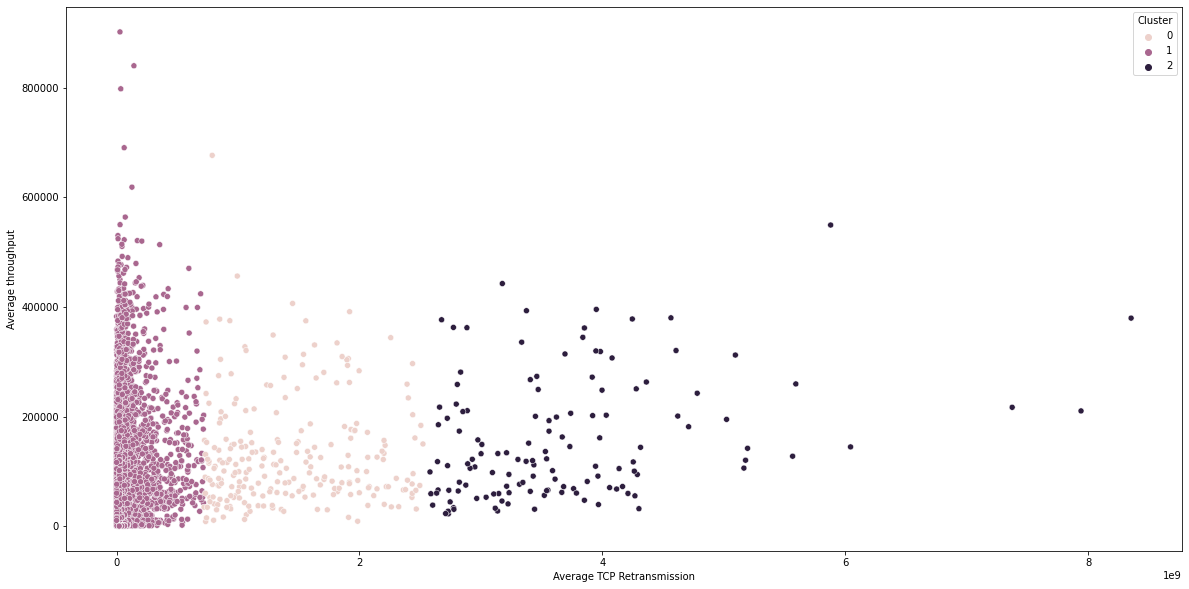

In [138]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Average TCP Retransmission", y="Average throughput", hue = 'Cluster',  data=transmission_per_user, ax=ax)